<a href="https://colab.research.google.com/github/codebjjung/DATA_ANALYSIS/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

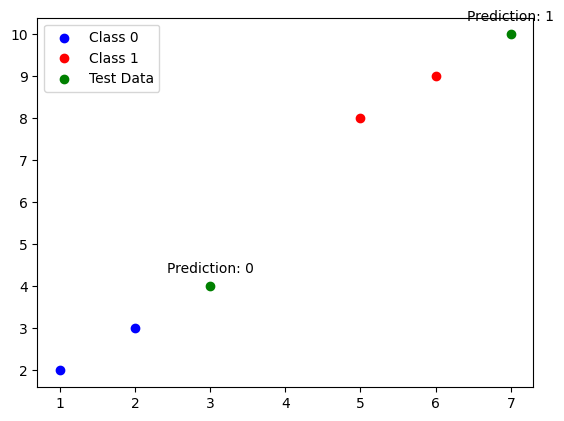

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# 가상의 데이터 생성
X_train = np.array([[1, 2], [2, 3], [5, 8], [6, 9]])
y_train = np.array([0, 0, 1, 1])
X_test = np.array([[3, 4], [7, 10]])

# KNN 모델 생성 및 훈련
knn = KNN(k=2)
knn.fit(X_train, y_train)

# 테스트 데이터 예측
predictions = knn.predict(X_test)

# 결과 시각화
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='b', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='r', label='Class 1')
plt.scatter(X_test[:, 0], X_test[:, 1], color='g', label='Test Data')

for i, pred in enumerate(predictions):
    plt.annotate(f'Prediction: {pred}', (X_test[i, 0], X_test[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()
plt.show()
